### show all ground observation station. 
water_level_station + glacier_station.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
path_gla_station_info = "data/ground-observation/glacier-station/glacier_station_info.gpkg" 
path_hma_extent = "data/hma-extent/HMA/hma_gtng_202307_subregions.gpkg"
path_hydro_station = "data/ground-observation/water-level-station/hydro_station.gpkg"


In [3]:
hma = gpd.read_file(path_hma_extent)
hydro = gpd.read_file(path_hydro_station)
gla_info_gdf = gpd.read_file(path_gla_station_info)
gla_show_gdf = gla_info_gdf.drop_duplicates("glacier")  # 每个实测脚点只显示一个（实测日期不同但位置相同）
gla_show_gdf


,glacier,rgi_id,date,resolution(m),data_size,geometry
0,24k,RGI2000-v7.0-G-15-16601,20231014,0.035,35978 × 50313,"POLYGON ((95.72406 29.75652, 95.72406 29.76811..."
2,KQGR,RGI2000-v7.0-G-13-61313,20230713,0.043,25112 × 36884,"POLYGON ((90.20499 29.85913, 90.20499 29.86917..."
4,LAIGU,RGI2000-v7.0-G-15-14618,20230718,0.269,12536 × 15929,"POLYGON ((96.81806 29.28251, 96.81806 29.31367..."
6,P4,RGI2000-v7.0-G-15-14585,20230805,0.056,46282 × 33462,"POLYGON ((96.94171 29.24191, 96.94171 29.26567..."


In [4]:
lon_center = (gla_info_gdf.bounds.minx + gla_info_gdf.bounds.maxx) / 2
lat_center = (gla_info_gdf.bounds.miny + gla_info_gdf.bounds.maxy) / 2


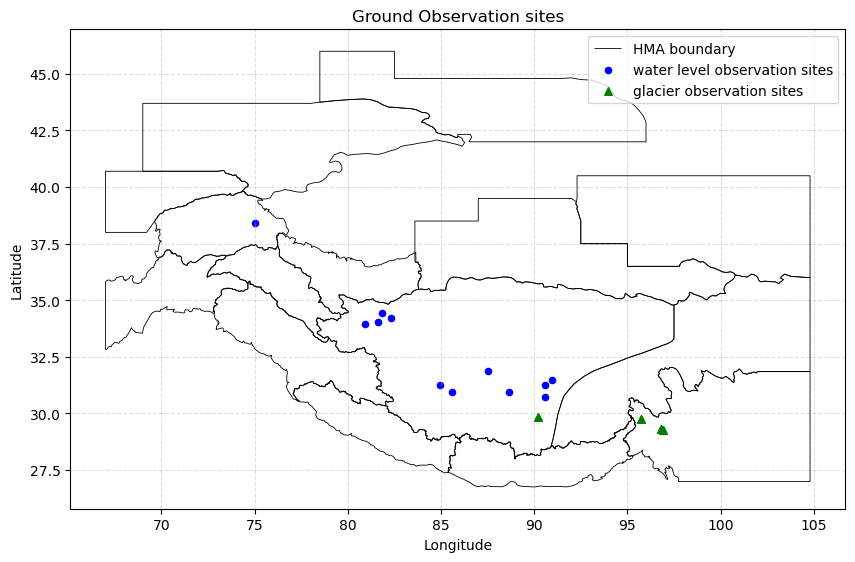

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
hma.boundary.plot(ax=ax, edgecolor="black", linewidth=0.6, label="HMA boundary")
hydro.plot(ax=ax, color="blue", markersize=20, label="water level observation sites")
ax.scatter(
    lon_center, lat_center,
    marker="^", s=30, color="green",
    label="glacier observation sites")
ax.legend()
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True, linestyle="--", alpha=0.4)
ax.set_title("Ground Observation sites")
fig.savefig("figures/ground-observation/ground_station_loc.png", bbox_inches='tight', dpi=200)